<h1 align=center>Trabalhando com dados não rotulados – Análise de cluster</h1>
<p align=center><img src=https://miro.medium.com/max/845/1*rFATWK6tWBrDJ1o1rzEZ8w.png></p>

Conhecemos algumas técnicas de aprendizado supervisionado para construir modelos de aprendizado de máquina, usando dados onde a resposta já era conhecida – os rótulos de classe já estavam disponíveis em nossos dados de treinamento. Agora, vamos mudar de marcha e explorar a **análise de cluster**, uma categoria de técnicas de *aprendizado não supervisionado* que nos permite descobrir estruturas ocultas em dados onde não sabemos a resposta certa antecipadamente. O objetivo do agrupamento é encontrar um agrupamento natural nos dados, de modo que os itens do mesmo agrupamento sejam mais semelhantes entre si do que os de agrupamentos diferentes.

### Agrupando objetos por similaridade usando *k-means*
Aprenderemos sobre um dos algoritmos de agrupamento mais populares, o *k-means*, que é amplamente utilizado na academia e na indústria. *Clustering* (ou análise de cluster) é uma técnica que nos permite encontrar grupos de objetos semelhantes que estão mais relacionados entre si do que com objetos de outros grupos. Exemplos de aplicativos de *clustering* orientados a negócios incluem o agrupamento de documentos, músicas e filmes por tópicos diferentes ou encontrar clientes que compartilhem interesses semelhantes com base em comportamentos de compra comuns como base para mecanismos de recomendação.

### Agrupamento *K-means* usando *scikit-learn*

Como você verá em um momento, o algoritmo *k-means* é extremamente fácil de implementar, mas também é **computacionalmente muito eficiente** em comparação com outros algoritmos de agrupamento, o que pode explicar sua popularidade. O algoritmo *k-means* pertence à categoria de agrupamento baseado em protótipo. Discutiremos duas outras categorias de agrupamento, **agrupamento hierárquico** e o **agrupamento baseado em densidade**.

Agrupamento baseado em protótipo significa que cada cluster é representado por um protótipo, que geralmente é o **centroide** (*média*) de pontos semelhantes com características contínuas, ou o **medoide** (o mais representativo ou o ponto que minimiza a distância a todos os outros pontos que pertencem para um determinado cluster) no caso de características categóricas. Embora o *k-means* seja muito bom para identificar *clusters* com formato esférico, uma das desvantagens desse algoritmo de agrupamento é que temos que especificar o número de *clusters*, $\small k$, a priori. Uma escolha inadequada para $\small k$ pode resultar em baixo desempenho de agrupamento. Mais adiante, discutiremos o **método do cotovelo** e os **gráficos de silhueta**, que são técnicas úteis para avaliar a qualidade de um agrupamento para nos ajudar a determinar o número ideal de agrupamentos, $\small k$.

Embora o clustering *k-means* possa ser aplicado a dados em dimensões mais altas, veremos os exemplos a seguir usando um conjunto de dados bidimensional simples para fins de visualização:

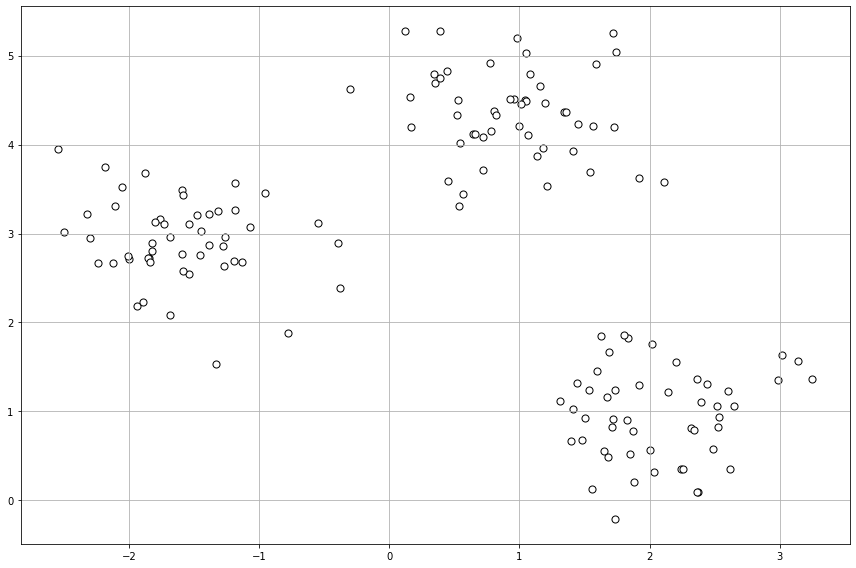

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()

plt.show()

O conjunto de dados que acabamos de criar consiste em 150 pontos gerados aleatoriamente que são agrupados aproximadamente em três regiões com maior densidade, que são visualizadas por meio de um gráfico de dispersão bidimensional.

Em aplicações de agrupamento do mundo real, não temos nenhuma informação de categoria de verdade básica (informações fornecidas como evidência empírica em oposição a inferência) sobre esses exemplos; se nos dessem rótulos de classe, essa tarefa se enquadraria na categoria de **aprendizado supervisionado**. Assim, nosso objetivo é agrupar os exemplos com base em suas semelhanças de recursos, o que pode ser alcançado usando o algoritmo *k-means*, resumido pelas quatro etapas a seguir:
1. Escolha aleatoriamente $\small k$ centroides dos exemplos como centros iniciais do *cluster*.
2. Atribua cada exemplo ao centróide mais próximo, $\small \mu^{j},j \in \{1,\cdots, k\}$.
3. Mova os centroides para o centro dos exemplos que lhe foram atribuídos.
4. Repita as etapas 2 e 3 até que as atribuições de *cluster* não sejam alteradas ou uma tolerância definida pelo usuário ou número máximo de iterações seja atingido.

Agora, a próxima pergunta é: como medimos a similaridade entre objetos? Podemos definir similaridade como o oposto de distância, e uma distância comumente usada para agrupar exemplos com feições contínuas é a **distância euclidiana quadrada** entre dois pontos, $\small x$ e $\small y$, no espaço $\small m$-dimensional:
$$
d(x,y)^{2} = \sum^{m}_{j=1}(x_{j} - y_ {j})^2 = \left \|x - y \right \|^{2}_{2}
$$

Observe que, na equação anterior, o índice $\small j$ se refere à $\small j$ nésima dimensão (coluna de recurso) das entradas de exemplo, $\small x$ e $\small y$. Usaremos os sobrescritos $\small i$ e $\small j$ para nos referirmos ao índice do exemplo (registro de dados) e ao índice do *cluster*, respectivamente.

Agora que você aprendeu como o algoritmo *k-means* simples funciona, vamos aplicá-lo ao nosso conjunto de dados de exemplo usando a classe `KMeans` do módulo `cluster` do *scikit-learn*:

In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,     # Definindo o número de cluster desejado.
            init = 'random',  # Inicia aleatoriamente.
            n_init=10,        # Executa o kmeans 10 vezes indepentendemente, com diferentes centroides para o escolher o modelo final com menor erro.
            max_iter=300,     # Número máximo de iterações para cada execução. Pode ser computacionalmente custoso em grandes interações.
            tol = 1e-04,      # Problemas de convergência. Utiliza valores grandes para a Tolerância em relação ao erro. 
            random_state=0)   

y_km = km.fit_predict(X)

Um problema com *k-means* é que um ou mais *clusters* podem estar vazios. Observe que esse problema não existe para *k-medoids* ou *fuzzy C-means*, um algoritmo que discutiremos mais adiante.

No entanto, esse problema é considerado na implementação atual do *k-means* no *scikit-learn*. Se um *cluster* estiver vazio, o algoritmo procurará o exemplo mais distante do centroide do *cluster* vazio. Em seguida, ele reatribuirá o centroide para ser este ponto mais distante.

> #### Dimensionamento de recursos
> Quando estamos aplicando *k-means* a dados do mundo real usando uma métrica de distância euclidiana, queremos ter certeza de que os recursos são medidos na > mesma escala e aplicar a padronização de *z-score* ou escala *min-max*, se necessário.

Tendo previsto os rótulos de *cluster*, $\small y\_km$, e discutido alguns dos desafios do algoritmo *k-means*, vamos agora visualizar os *clusters* que o *k-means* identificou no conjunto de dados junto com os centróides do *cluster*. Eles são armazenados no atributo `cluster_centers_` do objeto `KMeans` ajustado:

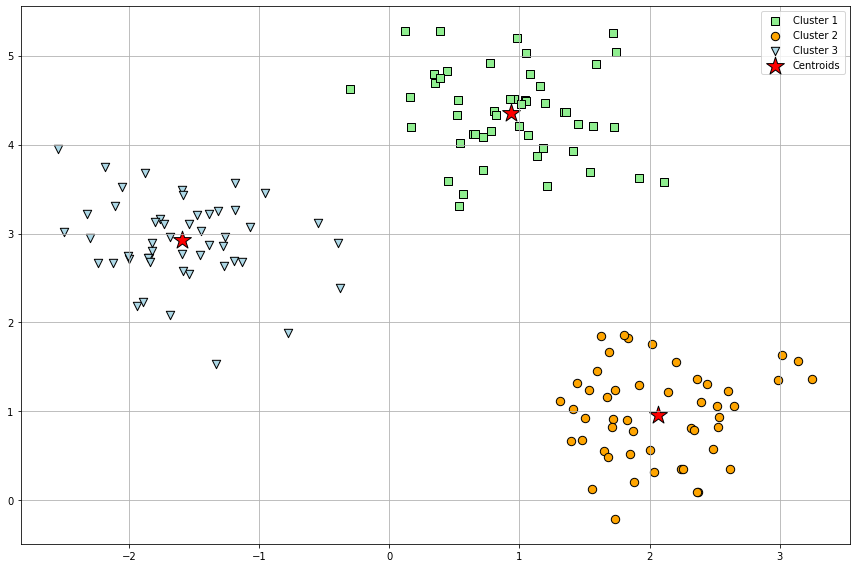

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=70, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=70, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=70, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=350, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

Embora o *k-means* tenha funcionado bem neste conjunto de dados de fictício, vamos destacar outra desvantagem do *k-means*: temos que especificar o número de *clusters*, $\small k$, *a priori*. O número de *clusters* a serem escolhidos nem sempre é tão óbvio em aplicativos do mundo real, especialmente, se estivermos trabalhando com um conjunto de dados de **dimensão mais alta** que não pode ser visualizado. As outras propriedades do *k-means* são que os *clusters* não se sobrepõem e não são hierárquicos, e também assumimos que há pelo menos um item em cada *cluster*.

Encontraremos diferentes tipos de algoritmos de agrupamento, **agrupamento hierárquico** e **agrupamento baseado em densidade**. Nenhum tipo de algoritmo exige que especifiquemos o número de *clusters* antecipadamente ou assumamos estruturas esféricas em nosso conjunto de dados. 

Agora, abordaremos uma variante popular do algoritmo *k-means* clássico chamado ***k-means++***. Embora não aborde essas suposições e desvantagens de *k-means* que foram discutidas no parágrafo anterior, ele pode melhorar muito os resultados de agrupamento por meio de uma propagação mais inteligente dos centros de agrupamento iniciais.

### Uma maneira mais inteligente de colocar os centróides iniciais do *cluster* usando *k-means++*

Até agora, discutimos o algoritmo *k-means* clássico, que usa uma semente aleatória para colocar os centróides iniciais, o que às vezes pode resultar em agrupamentos ruins ou convergência lenta se os centróides iniciais forem mal escolhidos. Uma maneira de resolver esse problema é executar o algoritmo *k-means* várias vezes em um conjunto de dados e escolher o modelo com melhor desempenho em termos de *SSE*.

Outra estratégia é colocar os centróides iniciais distantes uns dos outros por meio do algoritmo *k-means++*, o que leva a resultados melhores e mais consistentes do que o *k-means* clássico.

A inicialização em *k-means++* pode ser resumida da seguinte forma:
1. Inicialize um conjunto vazio, $\small M$, para armazenar os $\small k$ centróides que estão sendo selecionados.
2. Escolha aleatoriamente o primeiro centroide, $\small \mu^{(j)}$, dos exemplos de entrada e atribua-o a $\small M$.
3. Para cada exemplo, $\small x^{(i)}$, que não está em $\small M$, encontre a distância ao quadrado mínimo, $\small d(x^{(i)},M)^{2}$,para qualquer um dos centróides em $\small M$.
4. Para selecionar aleatoriamente o próximo centróide, $\small \mu^{(p)}$, use uma distribuição de probabilidade ponderada igual a $\small \dfrac{d(\mu^{(p)},M)^{2}}{\sum_{i}d(x^{(i)},M)^{2}}$.
5. Repita os passos 2 e 3 até que $\small k$ centróides sejam escolhidos.
6. Prossiga com o algoritmo *k-means* clássico.

Para usar o *k-means++* com o objeto `KMeans` do *scikit-learn*, só precisamos definir o parâmetro `init` como `k-means++`. Na verdade, `k-means++` é o argumento padrão para o parâmetro `init`, que é fortemente recomendado na prática. A única razão pela qual não o usamos no exemplo anterior foi para não introduzir muitos conceitos de uma só vez. O resto desta seção sobre * * usará *k-means++*, mas é desejável experimentarmos as duas abordagens diferentes (*k-means* clássico via `init='random'` versus *k-means++* via `init='k-means++'`) para colocar os centróides iniciais do *cluster*.

### Agrupamento rígido versus flexível
***Hard clustering*** descreve uma família de algoritmos em que cada exemplo em um conjunto de dados é atribuído a exatamente um *cluster*, como nos algoritmos *k-means* e *k-means++* que discutimos anteriormente. Em contraste, os algoritmos para agrupamento suave (às vezes também chamado agrupamento difuso) atribuem um exemplo a um ou mais agrupamentos. Um exemplo popular de *soft clustering* é o algoritmo *fuzzy C-means* (FCM) (também chamado *soft k-means* ou *fuzzy k-means*).

O procedimento *FCM* é muito semelhante ao *k-means*. No entanto, substituímos a atribuição de *cluster* difícil por probabilidades para cada ponto pertencente a cada *cluster*. Em *k-means*, podemos expressar a associação de *cluster* de um exemplo, $\small x$, com um vetor esparso de valores binários.

### Usando o método do cotovelo para encontrar o número ideal de *clusters*

Um dos principais desafios da aprendizagem não supervisionada é que não sabemos a resposta definitiva. Não temos os rótulos de classe de verdade em nosso conjunto de dados que nos permitem aplicar as técnicas para avaliar o desempenho de um modelo supervisionado. Assim, para quantificar a qualidade do *clustering*, precisamos usar métricas intrínsecas – como o *SSE* dentro do *cluster* (distorção) – para comparar o desempenho de diferentes *clusters* *k-means*.

Convenientemente, não precisamos calcular o *SSE* dentro do *cluster* explicitamente quando estamos usando *scikit-learn*, pois ele já está acessível através do atributo `inertia_` após ajustar um modelo `KMeans`:

In [5]:
print(f"Distorção: {km.inertia_:.2f}")

Distorção: 72.48


Com base no *SSE* dentro do *cluster*, podemos usar uma ferramenta gráfica, o chamado **método do cotovelo**, para estimar o número ótimo de *clusters*, $\small k$, para uma determinada tarefa. Podemos dizer que se $\small k$ aumentar, a distorção diminuirá. Isso ocorre porque os exemplos estarão mais próximos dos centróides aos quais são atribuídos. A ideia por trás do **método do cotovelo** é identificar o valor de $\small k$ onde a distorção começa a aumentar mais rapidamente, o que ficará mais claro se traçarmos a distorção para diferentes valores de $\small k$:

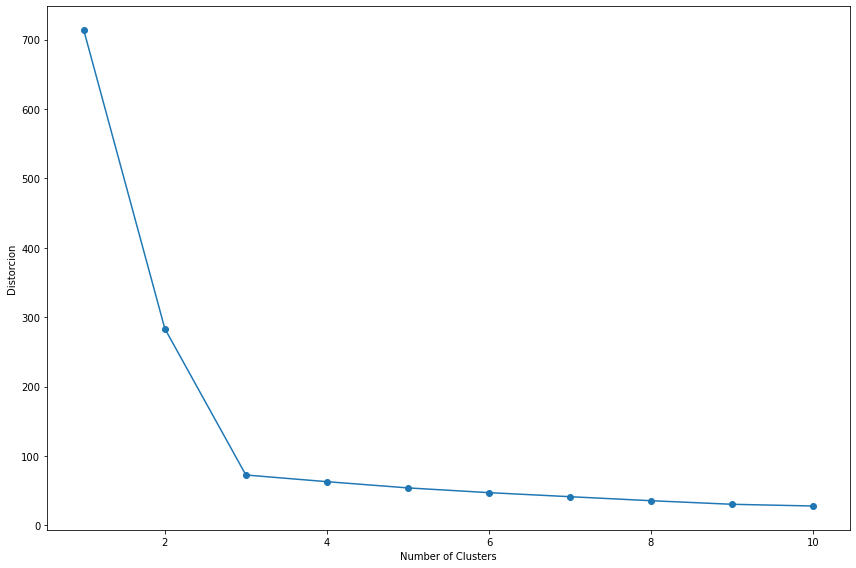

In [6]:
import warnings
warnings.filterwarnings('ignore')

distorcions = []
for i in range(1,11):
    km=KMeans(n_clusters=i,
              init='k-means++',
              n_init=10,
              max_iter=300,
              random_state=0)
    km.fit(X)
    distorcions.append(km.inertia_)

# Plotando os dados
plt.figure(figsize=(12,8))
plt.plot(range(1,11), distorcions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distorcion')
plt.tight_layout()
plt.show()

Como você pode ver no gráfico acima, o cotovelo está localizado em` k = 3`, então isso é uma evidência de que *k = 3* é de fato uma boa escolha para este conjunto de dados.

### Quantificando a qualidade do agrupamento por meio de gráficos de silhueta

Outra métrica intrínseca para avaliar a qualidade de um agrupamento é a análise de silhueta, que também pode ser aplicada a algoritmos de agrupamento diferentes de *k-means*. A análise de silhueta pode ser usada como uma ferramenta gráfica para traçar uma medida de quão bem agrupados são os exemplos nos *clusters*.

O coeficiente de silhueta é limitado no intervalo -1 a 1 e está disponível como `silhouette_samples` do módulo `metric` do *scikit-learn* e, opcionalmente, a função `silhouette_scores` pode ser importada por conveniência. A função `silhouette_scores` calcula o coeficiente médio de silhueta em todos os exemplos, que é equivalente a `numpy.mean(silhouette_samples(...))`.


 Para calcular o coeficiente de silhueta de um único exemplo em nosso conjunto de dados, podemos utilizar o código a seguir:

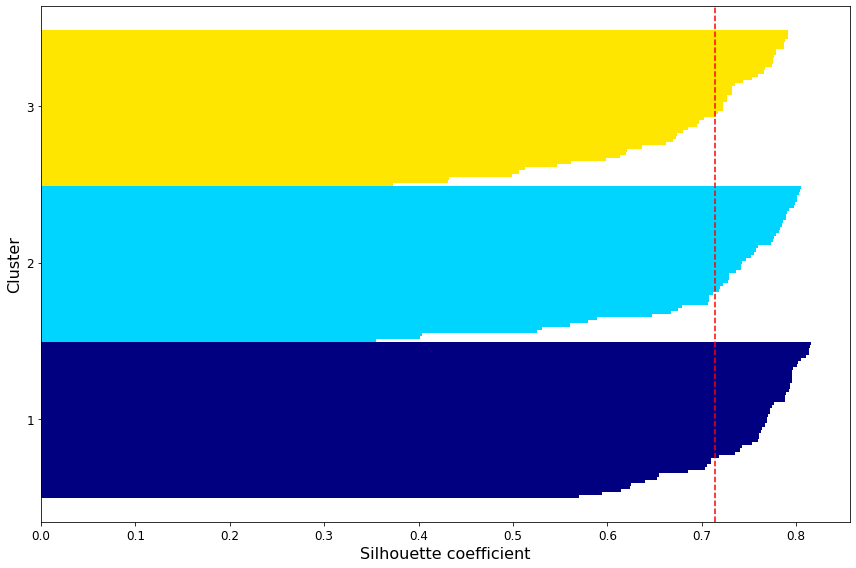

In [12]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

plt.figure(figsize=(12,8))
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)

# Plotando o gráfico 
plt.axvline(silhouette_avg, color="red", linestyle="--") 
plt.yticks(yticks, cluster_labels + 1, fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Cluster',fontsize=16)
plt.xlabel('Silhouette coefficient', fontsize=16)
plt.tight_layout()
plt.show()

Através de uma inspeção visual do gráfico de silhueta, podemos examinar rapidamente os tamanhos dos diferentes *clusters* e identificar *clusters* que contêm *outliers*.

Embora o agrupamento abaixo não pareça completamente terrível, podemos considerar razoável.

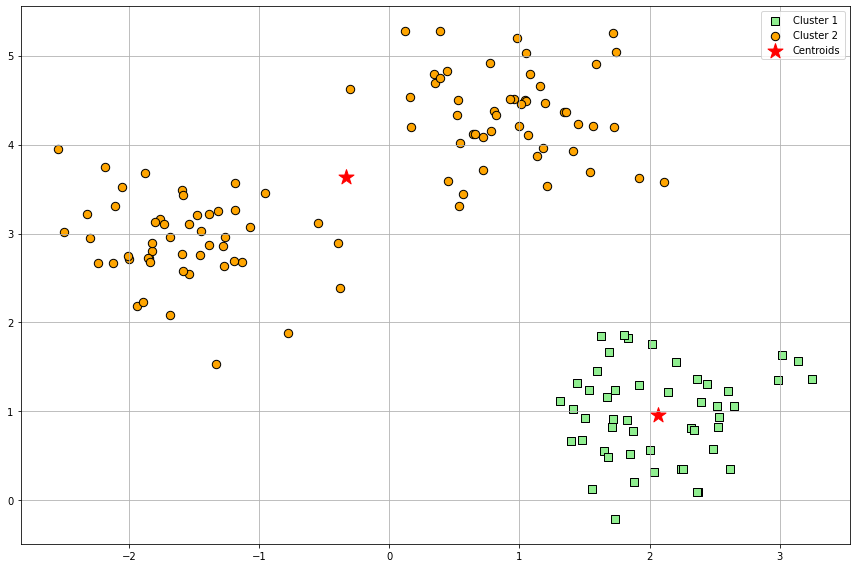

In [15]:
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.figure(figsize=(12,8))
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=70,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=70,
            c='orange',
            edgecolor='black',
            marker='o',
            label='Cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='Centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Lembre-se de que normalmente não temos o luxo de visualizar conjuntos de dados em gráficos de dispersão bidimensionais em problemas do mundo real, pois normalmente trabalhamos com dados **em dimensões mais altas**. Então, a seguir, vamos criar o gráfico de silhueta para avaliar os resultados

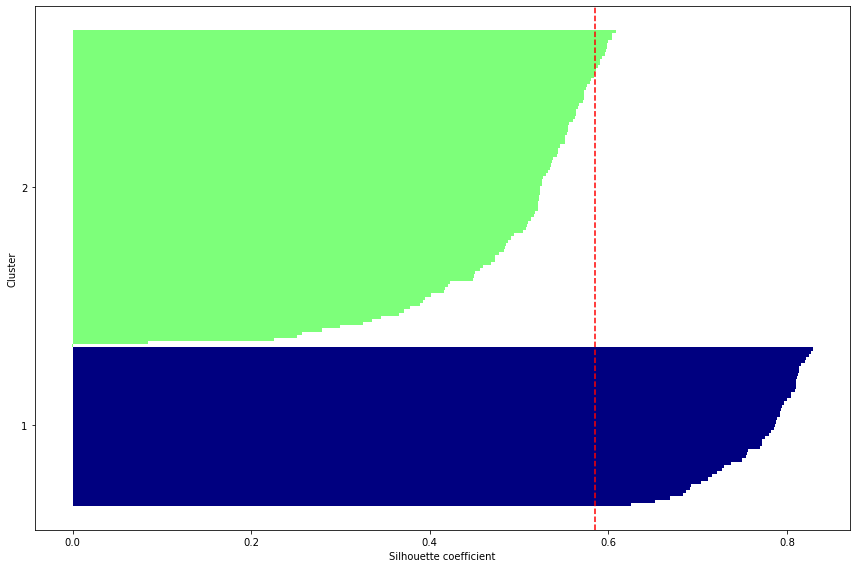

In [17]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

plt.figure(figsize=(12,8))
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

Como você pode ver no gráfico resultante, as silhuetas agora têm comprimentos e larguras visivelmente diferentes, o que é evidência de um agrupamento relativamente ruim ou pelo menos razoável.

### Organizando *clusters* como uma árvore hierárquica
Vamos dar uma olhada em uma abordagem alternativa para *clustering* baseado em protótipo: **clustering hierárquico**. Uma vantagem do algoritmo de agrupamento hierárquico é que ele nos permite traçar **dendrogramas (visualizações de um agrupamento hierárquico binário)**, o que pode ajudar na interpretação dos resultados criando taxonomias significativas. Outra vantagem dessa abordagem hierárquica é que não precisamos especificar o número de *clusters* antecipadamente. 

As duas principais abordagens para agrupamento hierárquico são agrupamento hierárquico **aglomerativo** e **divisivo**. No **clustering hierárquico** divisivo, começamos com um *cluster* que engloba o conjunto de dados completo e dividimos iterativamente o *cluster* em *clusters* menores até que cada *cluster* contenha apenas um exemplo. Vamos nos concentrar no agrupamento aglomerativo, que adota a abordagem oposta. Começamos com cada exemplo como um *cluster* individual e mesclamos os pares de *clusters* mais próximos até restar apenas um *cluster*.

### Agrupando *clusters* de forma ascendente
Os dois algoritmos padrão para agrupamento hierárquico aglomerativo são **ligação única** e **ligação completa**. Usando a ligação simples, calculamos as distâncias entre os membros mais semelhantes para cada par de *clusters* e mesclamos os dois *clusters* para os quais a distância entre os membros mais semelhantes é a menor. A abordagem de vinculação completa é semelhante à vinculação única, mas, em vez de comparar os membros mais semelhantes em cada par de *clusters*, comparamos os membros mais diferentes para realizar a mesclagem. Isso é mostrado no diagrama a seguir:

<p align=center><img src=https://www.researchgate.net/profile/Pamela-Guevara/publication/281014334/figure/fig57/AS:418517879934980@1476793847581/The-three-linkage-types-of-hierarchical-clustering-single-link-complete-link-and.png></p>

> #### Tipos alternativos de ligações
> Outros algoritmos comumente usados para agrupamento hierárquico aglomerativo incluem a **ligação média** e a **ligação de Ward**. Na ligação média, mesclamos os pares de *clusters* com base nas distâncias médias mínimas entre todos os membros do grupo nos dois *clusters*. Na vinculação de *Ward*, os dois *clusters* que levam ao aumento mínimo do *SSE total* dentro do *cluster* são mesclados.


In [19]:
# Gerando dados randomicamente para exemplificar
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df


,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


### Executando agrupamento hierárquico em uma matriz de distância
Para calcular a matriz de distância como entrada para o algoritmo de agrupamento hierárquico, usaremos a função `pdist` do submódulo `espacial.distance` do *SciPy*:

In [21]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(
    squareform(
        pdist(df,metric='euclidean')
        ),
        columns=labels,
        index=labels
)

row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


Usando o código anterior, calculamos a *distância euclidiana* entre cada par de exemplos de entrada em nosso conjunto de dados com base nos recursos $\small X$, $\small Y$ e $\small Z$.

Fornecemos a matriz de distância condensada - retornada por `pdist` - como entrada para a função `squareform` para criar uma matriz simétrica das distâncias em pares, conforme mostrado acima.

Em seguida, aplicaremos a aglomeração de ligação completa aos nossos *clusters* usando a função `linkage` do submódulo `cluster.hierarchy` do *SciPy*, que retorna a chamada **matriz de ligação**.

Com base na descrição da função, entendemos que podemos usar uma matriz de distância condensada (triangular superior) da função `pdist` como atributo de entrada. Alternativamente, também podemos fornecer o array de dados inicial e usar a métrica `euclidean` como um argumento de função na `linkage`. No entanto, não devemos usar a matriz de distância `squareform` que definimos anteriormente, pois ela produziria valores de distância diferentes do esperado. Para resumir, os três cenários possíveis estão listados aqui:

In [23]:
# 1. Abordagem incorreta: matriz de distância "squareform"
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,6.521973,2.0
cluster 2,1.0,2.0,6.729603,2.0
cluster 3,3.0,5.0,8.539247,3.0
cluster 4,6.0,7.0,12.444824,5.0


In [25]:
# 2. Abordagem correta: matriz de distância condensada

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [24]:
# 3. Abordagem correta: matriz de entrada

row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


Conforme mostrado na captura de tela a seguir, a matriz de ligação consiste em várias linhas em que cada linha representa uma mesclagem. A primeira e a segunda colunas denotam os membros mais diferentes em cada cluster, e a terceira coluna informa a distância entre esses membros. A última coluna retorna a contagem dos membros em cada *cluster*.

Agora que calculamos a matriz de ligação, podemos visualizar os resultados na forma de **um dendrograma**:

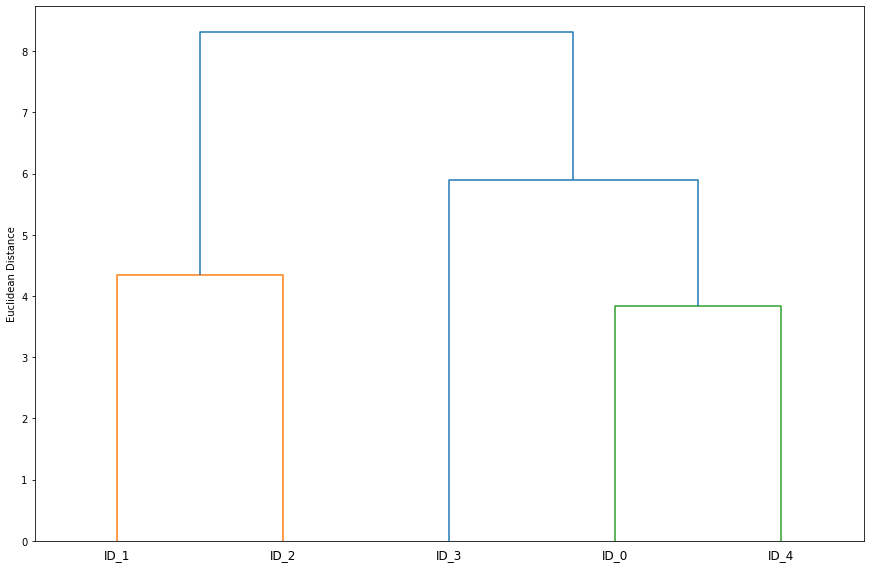

In [29]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(12,8))
row_dendo = dendrogram(row_clusters,labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean Distance')
plt.show()

Tal dendrograma resume os diferentes *clusters* que foram formados durante o agrupamento **hierárquico aglomerativo**; por exemplo, você pode ver que os exemplos ID_0 e ID_4, seguidos por ID_1 e ID_2, são **os mais semelhantes** com base na métrica de distância euclidiana.

### Anexando dendrogramas a um mapa de calor
Em aplicações práticas, os dendrogramas de agrupamento hierárquico são frequentemente usados em combinação com um **mapa de calor**, o que nos permite representar os valores individuais na matriz de dados ou matriz contendo nossos exemplos de treinamento com um código de cores. Nesta seção, discutiremos como anexar um dendrograma a um gráfico de mapa de calor e ordenar as linhas no mapa de calor de forma correspondente. No entanto, anexar um dendrograma a um mapa de calor pode ser um pouco complicado, então vamos passar por seu procedimento passo a passo:
1. Criamos um novo objeto `figure` e definimos a posição do eixo $\small x$, a posição do eixo $\small y$, a largura e a altura do dendrograma por meio do atributo `add_axes`. Além disso, giramos o dendrograma 90 graus no sentido anti-horário. O código é o seguinte:

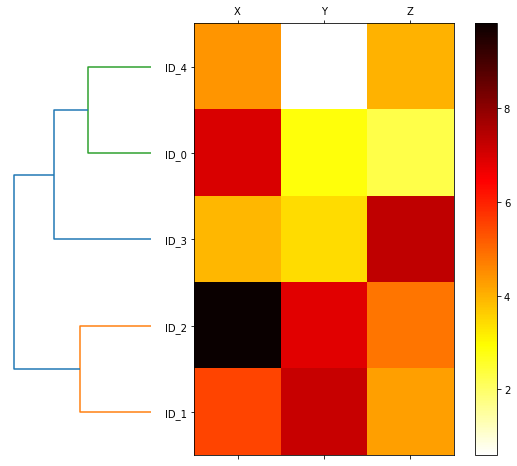

In [46]:
# Plotagem do Dendrograma de linha
fig = plt.figure(figsize=(10,10), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# Note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# reordenar dados em relação ao agrupamento
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remover espinhas de eixos do dendrograma
for i in axd.spines.values():
    i.set_visible(False)

# plotar mapa de calor
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

#plt.savefig('images/11_12.png', dpi=300)
plt.show()

Como você pode ver, a ordem das linhas no mapa de calor reflete o agrupamento dos exemplos no dendrograma. Além de um dendrograma simples, os valores codificados por cores de cada exemplo e recurso no mapa de calor nos fornecem um bom resumo do conjunto de dados.